In [1]:
import numpy as np
import pandas as pd

In [2]:
item_data=pd.read_csv("../DA/Online_Retail.csv")
item_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


<AxesSubplot:>

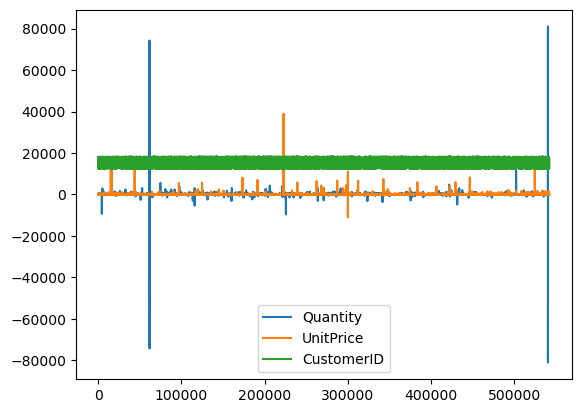

In [3]:
import matplotlib.pyplot as plt

item_data.plot()

In [4]:
item_data=item_data.loc[item_data["Quantity"]>0]
item_data=item_data.loc[item_data["UnitPrice"]>0]

In [5]:
print(item_data.isnull().sum())
item_data.shape

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64


(530104, 8)

In [6]:
item_data["date"]=pd.to_datetime(item_data["InvoiceDate"]).dt.strftime("%d-%m-%y")
item_data.drop(["InvoiceDate"],axis=1,inplace=True)

item_data.dropna(inplace=True)

In [7]:
print(item_data.isnull().sum())
item_data.shape

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
date           0
dtype: int64


(397884, 8)

In [8]:
ci_matrix=item_data.pivot_table(index="CustomerID",columns="StockCode",values="Quantity",aggfunc="sum")
ci_matrix

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ci_matrix = ci_matrix.applymap(lambda x: 1 if x>0 else 0)

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
ii_matrix=pd.DataFrame(cosine_similarity(ci_matrix.T))

In [11]:
ii_matrix.columns = ci_matrix.T.index
ii_matrix['StockCode'] = ci_matrix.T.index
ii_matrix = ii_matrix.set_index('StockCode')

In [12]:
ii_matrix

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.094868,0.091287,0.0,0.000000,0.090351,0.062932,0.098907,0.095346,...,0.000000,0.0,0.000000,0.0,0.000000,0.029361,0.0,0.067591,0.0,0.078217
10080,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.032774,0.045655,0.047836,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.016345,0.0,0.000000
10120,0.094868,0.000000,1.000000,0.115470,0.0,0.000000,0.057143,0.059702,0.041703,0.060302,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.071247,0.0,0.010993
10123C,0.091287,0.000000,0.115470,1.000000,0.0,0.000000,0.164957,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.000000,0.000000,0.000000,1.0,0.447214,0.063888,0.044499,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,0.029361,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.036955,0.019360,0.055989,...,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.026460,0.0,0.020413
DOT,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.104257,0.150756,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.000000
M,0.067591,0.016345,0.071247,0.000000,0.0,0.000000,0.071247,0.070893,0.066852,0.107409,...,0.050379,0.0,0.041135,0.0,0.090121,0.026460,0.0,1.000000,0.0,0.070490


In [13]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   UnitPrice    397884 non-null  float64
 5   CustomerID   397884 non-null  float64
 6   Country      397884 non-null  object 
 7   date         397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [20]:
#change the customer id from here 
# change the date from here 
id=13668.0
t="26-07-11"
val=(item_data["StockCode"].where((item_data["CustomerID"]==id) & (item_data["date"]==t)))
val.dropna(inplace=True)
user_data=(val.unique())

In [21]:
def recom(n):
    l=list(ii_matrix.loc[n].sort_values(ascending=False).iloc[:5].index)
    print("the recommended item for :")
    print(item_data.loc[item_data["StockCode"].isin(l),["StockCode","Description"]].drop_duplicates().set_index('StockCode').loc[l])

In [22]:
print("the recommendation for customer id= "+str(int(id))+" on date : "+t)


for i in user_data:
    recom(i)

the recommendation for customer id= 13668 on date : 26-07-11
the recommended item for :
                               Description
StockCode                                 
23169              CLASSIC GLASS SWEET JAR
23169             CLASSIC GLASS COOKIE JAR
22697      GREEN REGENCY TEACUP AND SAUCER
23165        LARGE CERAMIC TOP STORAGE JAR
23320         GIANT 50'S CHRISTMAS CRACKER
23298                       SPOTTY BUNTING
23298                    BUNTING , SPOTTY 
the recommended item for :
                            Description
StockCode                              
21531      RED RETROSPOT SUGAR JAM BOWL
21535      RED RETROSPOT SMALL MILK JUG
21539         RED RETROSPOT BUTTER DISH
21533          RETROSPOT LARGE MILK JUG
21844                 RED RETROSPOT MUG
the recommended item for :
                            Description
StockCode                              
23068           ALUMINIUM STAMPED HEART
23068                   ALUMINIUM HEART
23067      HANGING ENGRAVED MET